In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import locale
locale.setlocale( locale.LC_ALL, "en_US.UTF-8")

### Load file and get series
movie = pd.read_csv("../Resources/US_movies_cleanup.csv")
movie.drop(columns = ["Unnamed: 0"], inplace=True)
### Drop all NaN based on Box Office
movie.dropna(subset=["Box Office"], how='all', inplace = True)

Actor = movie["Actor"].tolist()        
BoxOffice= movie["Box Office"].tolist() 
L = len(BoxOffice)

In [2]:
### Load Actors counts and get top20
movie_actor = pd.read_csv("../Resources/US_movies_Actors.csv")
movie_actor.drop(columns = ["Unnamed: 0"], inplace=True)
movie_actor.sort_values(by=["Actor Counts"], ascending=False, inplace= True)
# movie_actor.head()
Actor_top20 = movie_actor[1:21].copy()["Actor Names"].tolist()
Actor_count_top20 = movie_actor[1:21].copy()["Actor Counts"].tolist()

In [3]:
### Get BoxOffice by Actors
BoxOffice_by_Actor = np.zeros(20)
A = len(Actor_top20)
for a in range(A):
    actor = Actor_top20[a]
    for l in range(L):
        try:
            Actor_type  = [x.strip() for x in Actor[l].split(',')]
            if actor in Actor_type:
                BoxOffice_num = locale.atof(BoxOffice[l].strip("$"))
                BoxOffice_by_Actor[a] = BoxOffice_by_Actor[a]+BoxOffice_num
        except Exception:
            print("There is no actor for movie")
BoxOffice_billion =  BoxOffice_by_Actor/1e9

There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie
There is no actor for movie


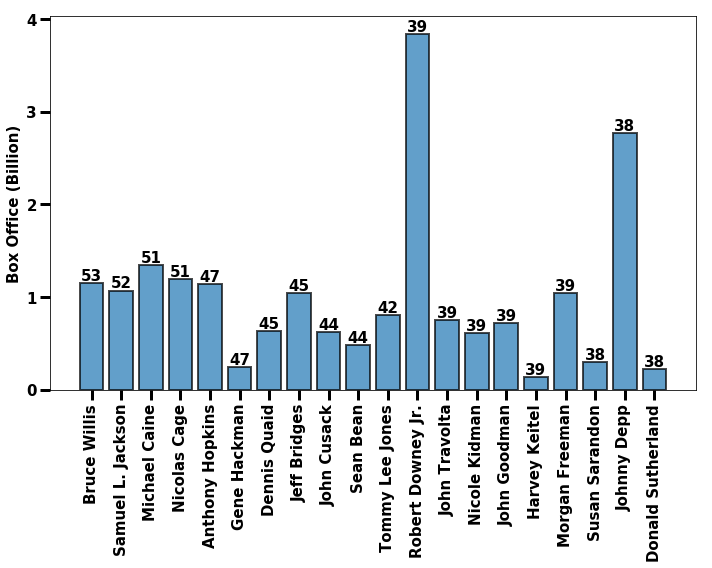

In [9]:
### Plot Figure
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(range(A), BoxOffice_billion, alpha=0.7, edgecolor="k", lw=2)

rects = ax.patches
for rect, label in zip(rects, Actor_count_top20):
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, height, 
            int(np.round(label)),
            ha='center', va='bottom', fontsize=15, weight="bold")
    
plt.xticks(range(A), Actor_top20, fontsize=15, weight="bold", rotation=90)
plt.yticks(np.arange(0,5,1), fontsize=15, weight="bold")
plt.ylabel("Box Office (Billion)", fontsize=15, weight="bold")

ax.xaxis.set_tick_params(width=3, size=10)
ax.yaxis.set_tick_params(width=3, size=10)

plt.tight_layout()
plt.savefig("../Figures/Movie_Actors_BoxOffice_BarPlot.png")
plt.show()